In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sns
#한글 설정
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) # y축

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/배달앱_및_배달대행_이용현황_2018-2020.csv')
df.head()

,특성별(1),특성별(2),특성별(3),특성별(4),2018,2018.1,2018.2,2018.3,2018.4,2018.5,...,2020.6,2020.7,2020.8,2020.9,2020.10,2020.11,2020.12,2020.13,2020.14,2020.15
0,특성별(1),특성별(2),특성별(3),특성별(4),배달앱,배달앱,배달앱,배달앱,배달앱,배달앱,...,배달앱,배달앱,배달대행,배달대행,배달대행,배달대행,배달대행,배달대행,배달대행,배달대행
1,특성별(1),특성별(2),특성별(3),특성별(4),이용여부 (%),이용여부 (%),월평균 비용,월평균 비용,월평균 비용,월평균 비용,...,월평균 비용,월평균 비용,이용여부 (%),이용여부 (%),월평균 비용,월평균 비용,월평균 비용,월평균 비용,월평균 비용,월평균 비용
2,특성별(1),특성별(2),특성별(3),특성별(4),예,아니오,5만원 미만 (%),5만원~15만원 미만 (%),15만원~50만원 미만 (%),50만원 이상 (%),...,모름 (%),평균 (원),예,아니오,5만원 미만 (%),5만원~15만원 미만 (%),15만원~50만원 미만 (%),50만원 이상 (%),모름 (%),평균 (원)
3,전체,소계,소계,소계,7.6,92.4,6.9,33.8,48.3,10.7,...,4.2,360436.1,15.4,84.6,7.2,13.7,38,36.6,4.4,1140045.3
4,업종별,일반음식점,소계,소계,6.2,93.8,5.2,36.8,44.3,13.7,...,4.1,353124.7,13.5,86.5,5.4,13.7,43.7,33.5,3.7,1388986.5


In [3]:
temp = df.melt(id_vars=['특성별(1)', '특성별(2)', '특성별(3)', '특성별(4)'], 
        var_name='연도', value_name='value')
temp

,특성별(1),특성별(2),특성별(3),특성별(4),연도,value
0,특성별(1),특성별(2),특성별(3),특성별(4),2018,배달앱
1,특성별(1),특성별(2),특성별(3),특성별(4),2018,이용여부 (%)
2,특성별(1),특성별(2),특성별(3),특성별(4),2018,예
3,전체,소계,소계,소계,2018,7.6
4,업종별,일반음식점,소계,소계,2018,6.2
...,...,...,...,...,...,...
1435,지역별,경북권,소계,소계,2020.15,689385.6
1436,매출액규모별,5천만원 미만,소계,소계,2020.15,482341.2
1437,매출액규모별,5천만원~1억원 미만,소계,소계,2020.15,417852.9
1438,매출액규모별,1억원~5억원 미만,소계,소계,2020.15,907715.3


In [4]:
temp1 = temp[(temp['연도'].isin(['2018', '2019', '2020'])) & (temp['특성별(1)']=='전체')]
temp1 = temp1.loc[:, ['연도', 'value']]
temp1.columns = ['연도', '배달앱이용(%)']
temp1

,연도,배달앱이용(%)
3,2018,7.6
483,2019,11.2
931,2020,19.9


In [5]:
temp1 = temp1.reset_index()
temp1 = temp1.drop(['index'], axis=1)
temp1

,연도,배달앱이용(%)
0,2018,7.6
1,2019,11.2
2,2020,19.9


In [6]:
temp1['배달앱이용(%)'] = temp1['배달앱이용(%)'].apply(pd.to_numeric)
temp1

,연도,배달앱이용(%)
0,2018,7.6
1,2019,11.2
2,2020,19.9


<AxesSubplot:xlabel='연도'>

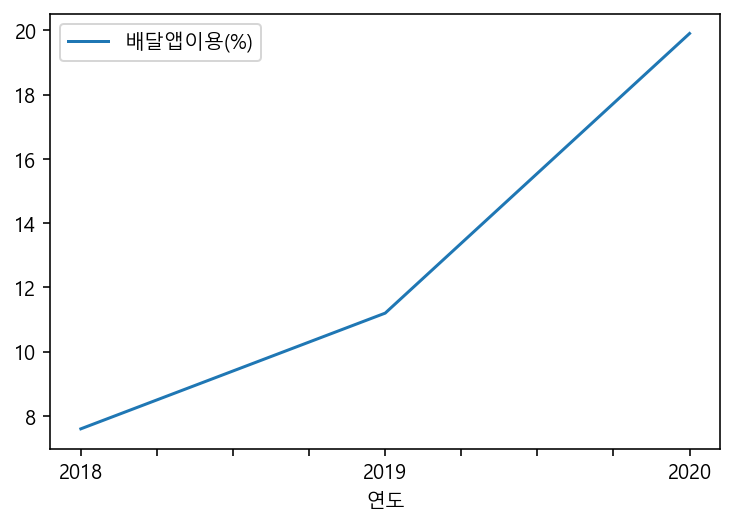

In [7]:
temp1.plot(x='연도')

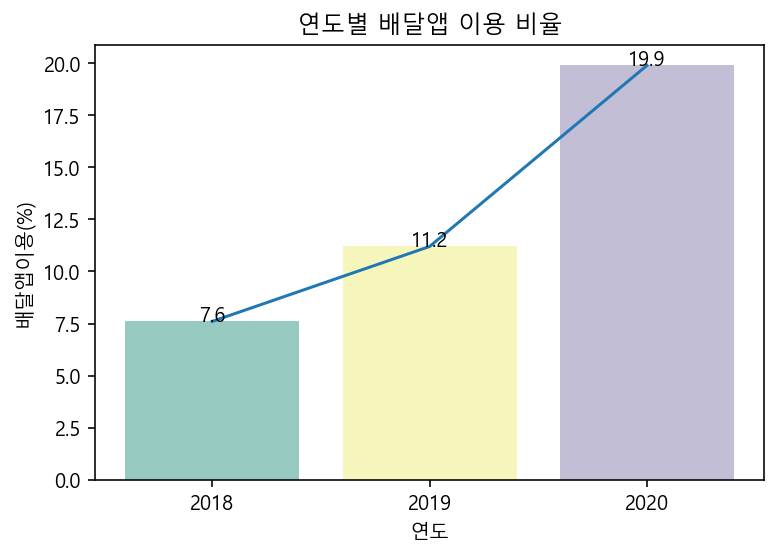

In [8]:
g = sns.barplot(x='연도', y='배달앱이용(%)', data=temp1, palette='Set3')
for i in range(temp1.shape[0]):
    g.text(x=i, y=temp1['배달앱이용(%)'][i], s=temp1['배달앱이용(%)'][i],
          horizontalalignment='center')
sns.lineplot(x='연도', y='배달앱이용(%)', data=temp1, palette='Set3')
plt.title('연도별 배달앱 이용 비율')
plt.savefig('data2/배달_연도별_배달앱_이용비율_2018-2020.jpg')

In [9]:
temp['연도'] = temp['연도'].apply(lambda x:x.split('.')[0])

In [10]:
temp['연도']

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
1435    2020
1436    2020
1437    2020
1438    2020
1439    2020
Name: 연도, Length: 1440, dtype: object

In [11]:
df1 = df.iloc[:4, 4:]
df1 = df1.T.reset_index()
df1.columns = ['연도', '구분1', '구분2', '구분3', '값']
df1['연도'] = df1['연도'].apply(lambda x:x.split('.')[0])
df1['값'] = df1['값'].apply(pd.to_numeric)
df1.to_csv('data/배달앱_전처리1.csv', sep=',')
df1

,연도,구분1,구분2,구분3,값
0,2018,배달앱,이용여부 (%),예,7.6
1,2018,배달앱,이용여부 (%),아니오,92.4
2,2018,배달앱,월평균 비용,5만원 미만 (%),6.9
3,2018,배달앱,월평균 비용,5만원~15만원 미만 (%),33.8
4,2018,배달앱,월평균 비용,15만원~50만원 미만 (%),48.3
5,2018,배달앱,월평균 비용,50만원 이상 (%),10.7
6,2018,배달앱,월평균 비용,무응답 (%),0.3
7,2018,배달앱,월평균 비용,평균 (원),246909.9
8,2018,배달대행,이용여부 (%),예,5.4
9,2018,배달대행,이용여부 (%),아니오,94.6


In [12]:
df1[((df1['구분2']=='월평균 비용')) & (df1['구분3']=='평균 (원)')]

,연도,구분1,구분2,구분3,값
7,2018,배달앱,월평균 비용,평균 (원),246909.9
14,2018,배달대행,월평균 비용,평균 (원),470113.0
21,2019,배달앱,월평균 비용,평균 (원),318230.4
28,2019,배달대행,월평균 비용,평균 (원),611564.5
36,2020,배달앱,월평균 비용,평균 (원),360436.1
44,2020,배달대행,월평균 비용,평균 (원),1140045.3


<AxesSubplot:xlabel='연도', ylabel='값'>

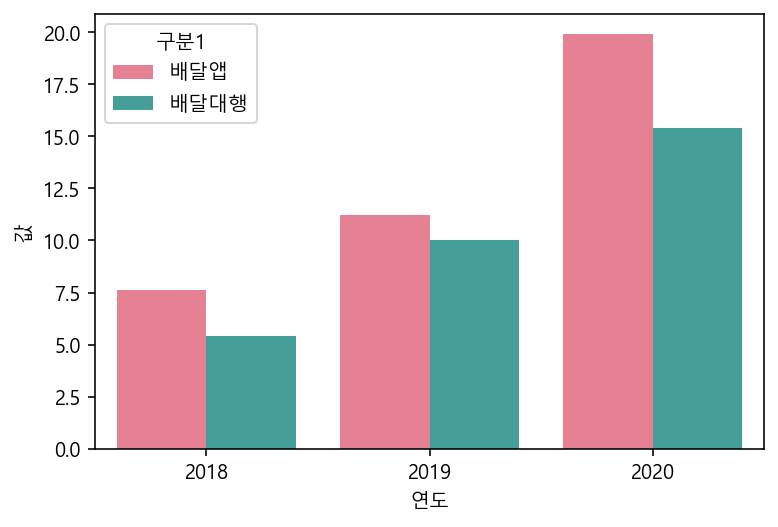

In [13]:
#df1.columns = ['연도', '구분1', '구분2', '구분3', '값']
#palette='husl'
sns.barplot(x='연도', y='값', data=df1[(df1['구분3']=='예')], 
            hue='구분1', palette='husl')

In [14]:
df1

,연도,구분1,구분2,구분3,값
0,2018,배달앱,이용여부 (%),예,7.6
1,2018,배달앱,이용여부 (%),아니오,92.4
2,2018,배달앱,월평균 비용,5만원 미만 (%),6.9
3,2018,배달앱,월평균 비용,5만원~15만원 미만 (%),33.8
4,2018,배달앱,월평균 비용,15만원~50만원 미만 (%),48.3
5,2018,배달앱,월평균 비용,50만원 이상 (%),10.7
6,2018,배달앱,월평균 비용,무응답 (%),0.3
7,2018,배달앱,월평균 비용,평균 (원),246909.9
8,2018,배달대행,이용여부 (%),예,5.4
9,2018,배달대행,이용여부 (%),아니오,94.6


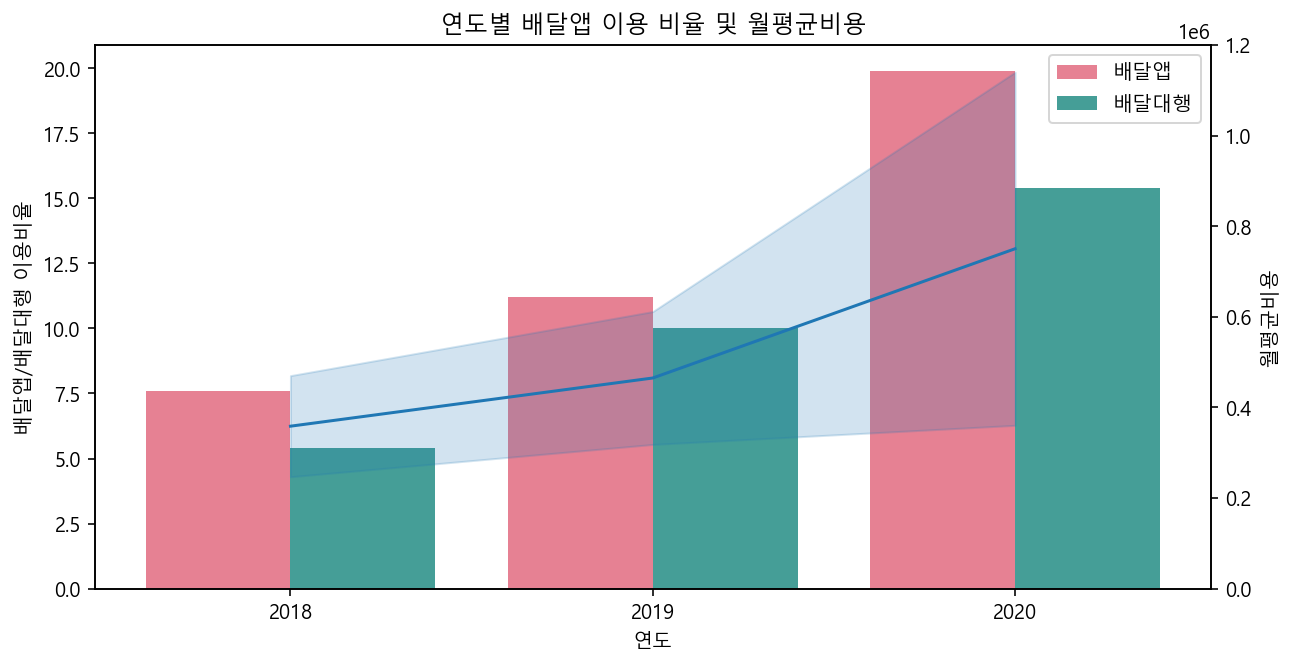

In [24]:
fig, ax1 = plt.subplots(figsize=(10,5))
#plt.subplots_adjust(hspace=0.4, wspace=0.3)
ax2 = ax1.twinx()
ax1 = sns.barplot(x='연도', y='값', data=df1[(df1['구분3']=='예')], 
            hue='구분1', palette='husl', ax=ax1)
ax1.set_ylabel('배달앱/배달대행 이용비율')
ax1.legend(loc='best')
sns.lineplot(x='연도', y='값', data=df1[((df1['구분2']=='월평균 비용')) & (df1['구분3']=='평균 (원)')], 
             palette='husl', ax=ax2)
ax2.set_yticks([0, 200000, 400000, 600000, 800000, 1000000, 1200000])
#ax2.set_yticklabels({'40만원', '60만원', '80만원', '100만원'})
#ax2.ticklabel_format(useOffset=False)
#ytickformat(ax2,'usd')
#ax2.ytickformat('usd')

ax2.set_ylabel('월평균비용')
plt.title('연도별 배달앱 이용 비율 및 월평균비용')
plt.savefig('data2/배달_연도별_배달앱_이용비율_월평균비용.jpg')

<AxesSubplot:xlabel='연도', ylabel='값'>

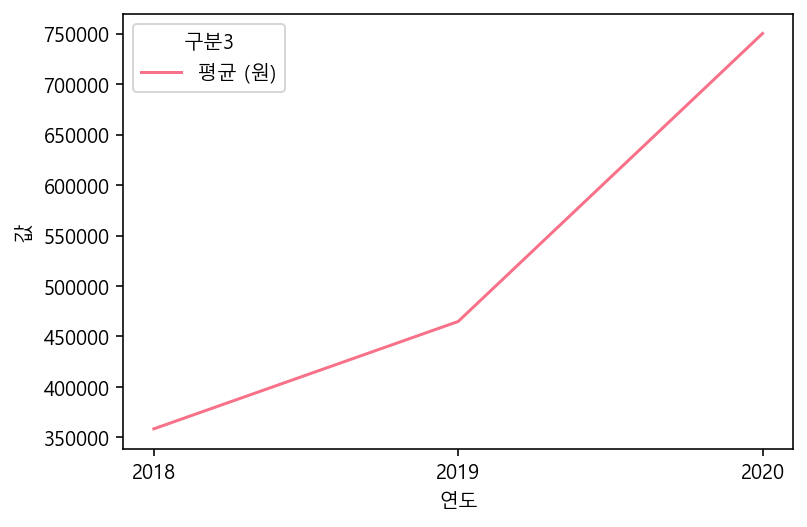

In [16]:
sns.lineplot(x='연도', y='값', data=df1[((df1['구분2']=='월평균 비용')) & (df1['구분3']=='평균 (원)')], 
            hue='구분3', palette='husl', ci=None)

In [17]:
df1[(df1['구분2']=='월평균 비용')]

,연도,구분1,구분2,구분3,값
2,2018,배달앱,월평균 비용,5만원 미만 (%),6.9
3,2018,배달앱,월평균 비용,5만원~15만원 미만 (%),33.8
4,2018,배달앱,월평균 비용,15만원~50만원 미만 (%),48.3
5,2018,배달앱,월평균 비용,50만원 이상 (%),10.7
6,2018,배달앱,월평균 비용,무응답 (%),0.3
7,2018,배달앱,월평균 비용,평균 (원),246909.9
10,2018,배달대행,월평균 비용,5만원 미만 (%),5.7
11,2018,배달대행,월평균 비용,5만원~15만원 미만 (%),23.7
12,2018,배달대행,월평균 비용,15만원~50만원 미만 (%),39.8
13,2018,배달대행,월평균 비용,50만원 이상 (%),30.9


In [18]:
df1.iloc[2,3]

'5만원 미만 (%)'

In [19]:
temp2 = temp[(temp['연도'].isin(['2018.7', '2019.6', '2020.7'])) & (temp['특성별(1)']=='전체')]
temp2 = temp2.loc[:, ['연도', 'value']]
temp2.columns = ['연도', '월평균비용']
temp2 = temp2.reset_index()
temp2 = temp2.drop(['index'], axis=1)
temp2['연도'] = temp2['연도'].apply(lambda x:x.split('.')[0])
temp2['월평균비용'] = temp2['월평균비용'].apply(pd.to_numeric)
temp2

,연도,월평균비용


In [ ]:
temp['연도'] = temp['연도'].apply(lambda x:x.split('.')[0])

In [ ]:
temp.columns